# Upper Confidence Bound (UCB)
* the agent aims to strike a balance between exploration and exploitation in order to make optimal decisions.

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
- the dataset : clicked(selected) by users for ad 1 to 10
> Our goal : to find the most attractive(selected by users) ad among 10 in minimum round (to reduce budget)

In [8]:
# CTR = Click Through Rate
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB
* clicked : 1 | not clicked 0
* the reward will be given if the users click the ads

In [27]:
# total number of users : 10,000
N = 10000

# the number of ads 
d = 10

# the list of ads selected over the round
ads_selected = []

# Step 1 
# the number of times the ad i was selected up to round n 
# initialize the list, the element will be incremented by each round
numbers_of_selections = [0] * d

# the sum of rewards of the ad i up to round n 
sums_of_rewards = [0] * d

# final vairable : cumulative reward (sum of all the reward over all of the round)
total_reward = 0

In [29]:
# Step 2 & 3
# need to compare each of confidence bound to find the maximum UCB 

import math

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    
    # loop over ad 1 to 10 
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            
            # the average reward of ad i up to round n
            avg_reward = sums_of_rewards[i] / numbers_of_selections[i]
            
            # the confidence interval at round n
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
        
            upper_bound = avg_reward + delta_i
           
        else: 
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        
        ads_selected.append(ad)
        numbers_of_selections[ad] = numbers_of_selections[ad] + 1
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward
        total_reward = total_reward + reward


## Visualising the results

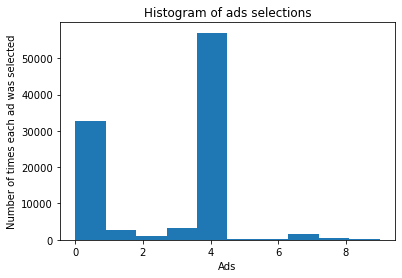

In [30]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()